In [45]:
import gymnasium as gym
import sumo_rl
import os
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from sumo_rl import SumoEnvironment

In [95]:
env = gym.make('sumo-rl-v0',
                net_file='single-intersection.net.xml',
                route_file='single-intersection-gen.rou.xml',
                out_csv_name='output.csv',
                use_gui=True,
                num_seconds=10000)
episodes = 3
for episode in range(1,episodes+1):
    obs, info = env.reset()
    done = False
    score = 0
    while not done:
        env.render()
        next_obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
        score += reward
        done = terminated or truncated
    print('Episode: {} Score: {}'.format(episode, score))
env.close()

c:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\utils\passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Episode: 1 Score: -40.59
Episode: 2 Score: -45.44
Episode: 3 Score: -71.81


In [ ]:
env1 = gym.make('sumo-rl-v0',
                net_file='single-intersection.net.xml',
                route_file='single-intersection-gen.rou.xml',
                out_csv_name='output.csv',
                use_gui=True,
                single_agent=True,    
                num_seconds=100000)

model = DQN(
        env=env1,
        policy="MlpPolicy",
        learning_rate=0.001,
        learning_starts=0,
        train_freq=1,
        target_update_interval=500,
        exploration_initial_eps=0.05,
        exploration_final_eps=0.01,
        verbose=1,
)
model.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2e+04    |
|    ep_rew_mean      | -130     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 9        |
|    time_elapsed     | 8123     |
|    total_timesteps  | 80000    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.81     |
|    n_updates        | 79999    |
----------------------------------


In [ ]:
model.save('Saved_model/DQN_MODEL3')

In [43]:
model1 = DQN.load('Saved_model/DQN_MODEL3',env=env1)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [96]:
env2 = gym.make('sumo-rl-v0',
                net_file='single-intersection.net.xml',
                route_file='single-intersection-gen.rou.xml',
                out_csv_name='output.csv',
                use_gui=True,
                single_agent=True,    
                num_seconds=10000)

episodes = 3
for episode in range(1,episodes+1):
    obs, _ = env2.reset()
    done = False
    score = 0
    while not done:
        env2.render()
        action = model1.predict(obs)
        obs, reward, terminated, truncated, info = env2.step(action[0])
        score += reward
        done = terminated or truncated
    print('Episode: {} Score: {}'.format(episode, score))
env2.close

Episode: 1 Score: -43.89
Episode: 2 Score: -40.07
Episode: 3 Score: -34.67


<bound method Wrapper.close of <OrderEnforcing<PassiveEnvChecker<SumoEnvironment<sumo-rl-v0>>>>>

In [97]:
env = gym.make('sumo-rl-v0',
                net_file='single-intersection.net.xml',
                route_file='single-intersection-gen.rou.xml',
                out_csv_name='output.csv',
                use_gui=True,
                single_agent=True,    
                num_seconds=10000)

evaluate_policy(model1,env = env,n_eval_episodes=5,render=True)

(-43.91999847330153, 5.280351830417085)

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def eval_plot(path,metric,path_compare = None):
    data = pd.read_csv(path)
    if path_compare is not None:
        data1 = pd.read_csv(path_compare)
    x = []
    for i in range(0,len(data)):
        x.append(i)

    y = data[metric]
    y_1 = pd.to_numeric(y)
    y_arr = np.array(y_1)
    if path_compare is not None:
        y2 = data1[metric]
        y_2 = pd.to_numeric(y2)
        y_arr2 = np.array(y_2)

    x_arr = np.array(x)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_title(metric)
    if path_compare is not None:
        ax2 = fig.add_subplot(2, 1, 2,sharey=ax1)
        ax2.set_title('compare '+metric)

    ax1.plot(x_arr,y_arr)
    
    if path_compare  is not None:
        ax2.plot(x_arr,y_arr2)
    
    fig.show() 

C:\Users\Pranav\AppData\Local\Temp\ipykernel_15988\2729226537.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Pranav\AppData\Local\Temp\ipykernel_15988\2729226537.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Pranav\AppData\Local\Temp\ipykernel_15988\2729226537.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Pranav\AppData\Local\Temp\ipykernel_15988\2729226537.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Pranav\AppData\Local\Temp\ipykernel_15988\2729226537.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Pranav\AppData\Local\Temp\ipykernel_15988\2729226537.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Pranav\AppData\Local\Temp\ipykernel_15988\2729226537.py

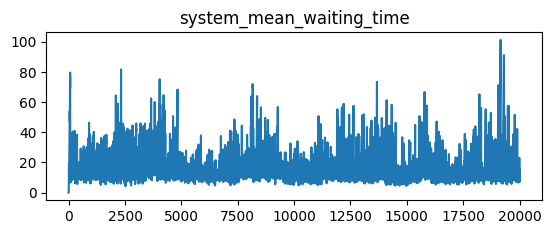

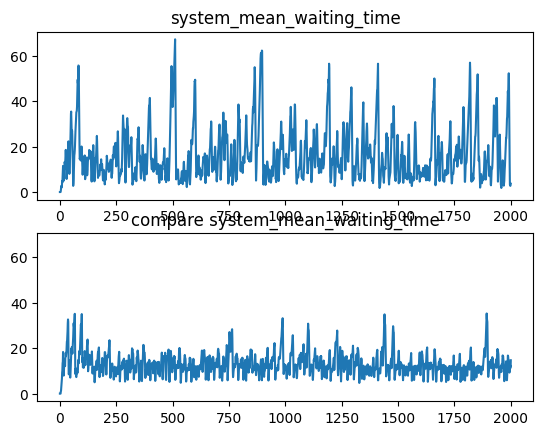

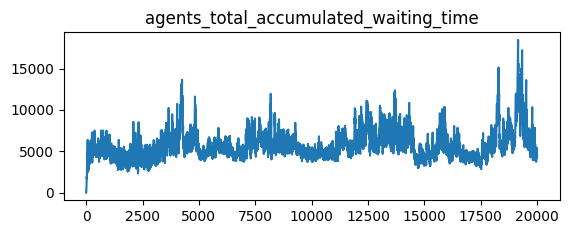

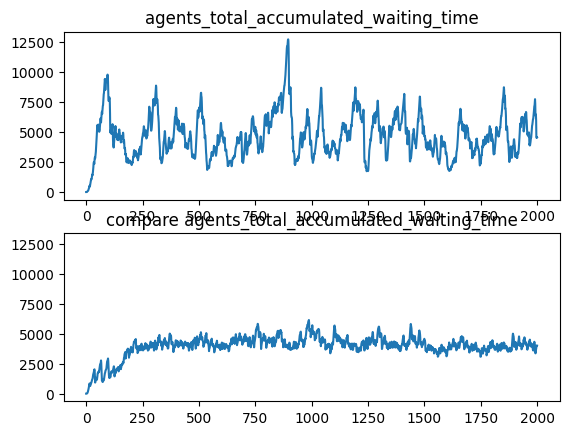

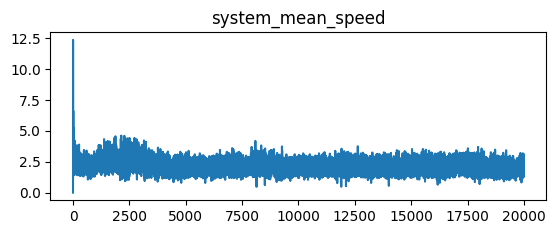

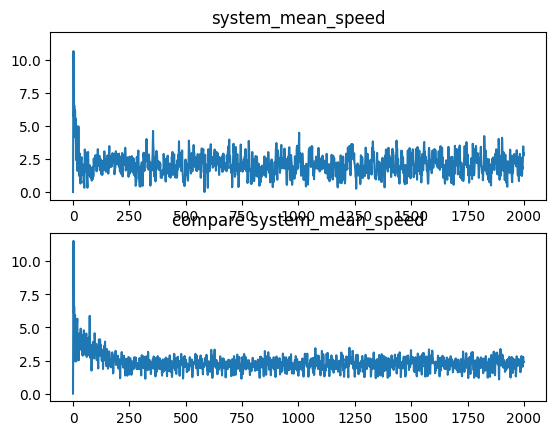

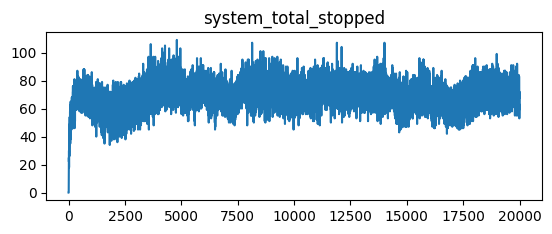

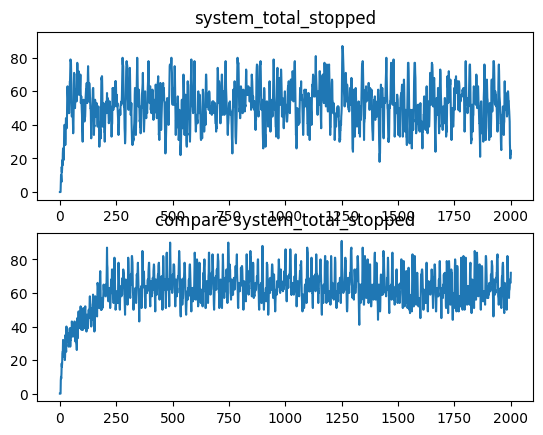

In [173]:
eval_plot('output.csv_conn20_ep5.csv','system_mean_waiting_time')
eval_plot('output.csv_conn43_ep2.csv','system_mean_waiting_time','output.csv_conn44_ep2.csv')
eval_plot('output.csv_conn20_ep5.csv','agents_total_accumulated_waiting_time')
eval_plot('output.csv_conn43_ep2.csv','agents_total_accumulated_waiting_time','output.csv_conn44_ep2.csv')
eval_plot('output.csv_conn20_ep5.csv','system_mean_speed')
eval_plot('output.csv_conn43_ep2.csv','system_mean_speed','output.csv_conn44_ep2.csv')
eval_plot('output.csv_conn20_ep5.csv','system_total_stopped')
eval_plot('output.csv_conn43_ep2.csv','system_total_stopped','output.csv_conn44_ep2.csv')